In [1]:
import sys, geopandas as gp

# supply the directory with the fetch.py script
sys.path.append(r'D:\GIS\TOOLBOXES\pysda')

# import the fetch.py script that 
# makes the call to Soil Data Access
import fetch as sda

In [2]:
# Make a simple request for some tabualr information
# write the query
# then request the results
q = """SELECT areasymbol, areaname, muname, musym, mukey
from legend, mapunit
where mapunit.lkey = legend.lkey
AND areasymbol = 'NE109'"""

tabResults = sda.tab(q=q)
tabResults

,areasymbol,areaname,muname,musym,mukey
0,NE109,"Lancaster County, Nebraska","Colo-Nodaway complex, frequently flooded",7773,2219259
1,NE109,"Lancaster County, Nebraska","Butler silt loam, 0 to 1 percent slopes",3820,1691344
2,NE109,"Lancaster County, Nebraska","Butler silt loam, terrace, 0 to 1 percent slopes",3713,1691345
3,NE109,"Lancaster County, Nebraska","Colo-Nodaway silty clay loams, frequently flooded",7774,1691347
4,NE109,"Lancaster County, Nebraska","Crete silt loam, terrace, 0 to 1 percent slopes",3709,1691348
...,...,...,...,...,...
91,NE109,"Lancaster County, Nebraska","Steinauer clay loam, 6 to 11 percent slopes, eroded",7614,1691391
92,NE109,"Lancaster County, Nebraska","Steinauer loam, 11 to 30 percent slopes",7617,1691390
93,NE109,"Lancaster County, Nebraska","Steinauer clay loam, 20 to 40 percent slopes",7620,1691392
94,NE109,"Lancaster County, Nebraska","Steinauer loam, 6 to 11 percent slopes",7616,1691389


In [3]:
# now lets get some spatial data
# specify your polygons (shapefile, geopackage, filegdb)
myshp = r'C:\Temp\sda_call_ex.shp'
myAOI = gp.read_file(myshp)


In [ ]:
%matplotlib inline
myAOI.plot()

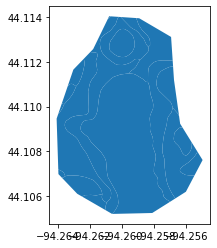

In [4]:
# make the call---
# shp = myshp
# meta = False
# export = True if you want to write the results to disk, same format in WGS84
# name = results name
# geodataframe returned
mySoils = sda.shp(shp = myshp, meta = False, export= True, name = 'my_soils')
mySoils.plot()


In [5]:
mySoils.head()

,areasymbol,areaname,muname,musym,mukey,nat_musym,geometry
0,MN013,"Blue Earth County, Minnesota","Clarion loam, 2 to 6 percent slopes",102B,396118,2s089,"POLYGON ((-94.26003 44.11221, -94.26025 44.11224, -94.26051 44.11235, -94.26073 44.11249, -94.26077 44.11254, -94.26080 44.11265, -94.26079 44.11275, -94.26076 44.11286, -94.26070 44.11296, -94.26034 44.11331, -94.26019 44.11342, -94.26005 44.11346, -94.25990 44.11347, -94.25983 44.11346, -94.25958 44.11336, -94.25937 44.11320, -94.25930 44.11311, -94.25926 44.11300, -94.25922 44.11284, -94.25921 44.11274, -94.25924 44.11263, -94.25934 44.11248, -94.25943 44.11240, -94.25954 44.11233, -94.25973 44.11224, -94.25988 44.11221, -94.26003 44.11221))"
1,MN013,"Blue Earth County, Minnesota","Clarion loam, 2 to 6 percent slopes",102B,396118,2s089,"POLYGON ((-94.26360 44.11011, -94.26374 44.11014, -94.26375 44.11014, -94.26340 44.11088, -94.26336 44.11093, -94.26325 44.11100, -94.26318 44.11102, -94.26310 44.11101, -94.26303 44.11099, -94.26285 44.11091, -94.26300 44.11066, -94.26311 44.11052, -94.26325 44.11039, -94.26360 44.11011))"
2,MN013,"Blue Earth County, Minnesota","Glencoe silty clay loam, 0 to 1 percent slopes",114,396134,2tsjs,"POLYGON ((-94.25912 44.11395, -94.25896 44.11364, -94.25876 44.11342, -94.25844 44.11319, -94.25831 44.11306, -94.25826 44.11290, -94.25826 44.11274, -94.25837 44.11267, -94.25849 44.11277, -94.25864 44.11302, -94.25898 44.11331, -94.25915 44.11341, -94.25935 44.11348, -94.25947 44.11355, -94.26009 44.11400, -94.25912 44.11395))"
3,MN013,"Blue Earth County, Minnesota","Glencoe silty clay loam, 0 to 1 percent slopes",114,396134,2tsjs,"POLYGON ((-94.25683 44.11179, -94.25704 44.11177, -94.25732 44.11169, -94.25758 44.11158, -94.25773 44.11146, -94.25781 44.11131, -94.25787 44.11105, -94.25783 44.11089, -94.25777 44.11079, -94.25769 44.11070, -94.25699 44.11021, -94.25692 44.11012, -94.25685 44.10995, -94.25693 44.10974, -94.25711 44.10957, -94.25718 44.10947, -94.25723 44.10920, -94.25738 44.10879, -94.25742 44.10863, -94.25748 44.10830, -94.25749 44.10803, -94.25748 44.10793, -94.25737 44.10767, -94.25735 44.10729, -94.25729 44.10692, -94.25722 44.10665, -94.25715 44.10650, -94.25702 44.10630, -94.25688 44.10611, -94.25669 44.10590, -94.25701 44.10576, -94.25725 44.10586, -94.25741 44.10598, -94.25749 44.10624, -94.25769 44.10640, -94.25776 44.10650, -94.25778 44.10655, -94.25777 44.10671, -94.25779 44.10682, -94.25782 44.10687, -94.25796 44.10699, -94.25802 44.10709, -94.25801 44.10730, -94.25792 44.10762, -94.25790 44.10778, -94.25793 44.10789, -94.25808 44.10820, -94.25809 44.10825, -94.25807 44.10846, -94.25809 44.10862, -94.25825 44.10893, -94.25826 44.10903, -94.25825 44.10920, -94.25828 44.10946, -94.25825 44.10962, -94.25807 44.10992, -94.25806 44.11008, -94.25809 44.11024, -94.25823 44.11055, -94.25830 44.11092, -94.25839 44.11110, -94.25838 44.11151, -94.25835 44.11172, -94.25828 44.11182, -94.25817 44.11190, -94.25805 44.11196, -94.25792 44.11202, -94.25778 44.11205, -94.25748 44.11207, -94.25685 44.11206, -94.25683 44.11179))"
4,MN013,"Blue Earth County, Minnesota","Glencoe silty clay loam, 0 to 1 percent slopes",114,396134,2tsjs,"POLYGON ((-94.26020 44.11401, -94.26024 44.11399, -94.26027 44.11394, -94.26040 44.11369, -94.26068 44.11343, -94.26079 44.11336, -94.26110 44.11321, -94.26127 44.11311, -94.26136 44.11296, -94.26138 44.11280, -94.26133 44.11258, -94.26125 44.11243, -94.26117 44.11234, -94.26096 44.11219, -94.26073 44.11205, -94.26041 44.11190, -94.26027 44.11186, -94.25998 44.11186, -94.25976 44.11189, -94.25954 44.11194, -94.25941 44.11199, -94.25924 44.11210, -94.25917 44.11212, -94.25902 44.11213, -94.25888 44.11209, -94.25915 44.11177, -94.25931 44.11166, -94.25944 44.11160, -94.25957 44.11148, -94.26009 44.11144, -94.26051 44.11133, -94.26070 44.11124, -94.26102 44.11102, -94.26121 44.11085, -94.26133 44.11071, -94.26145 44.11034, -94.26153 44.10981, -94.26163 44.10960, -94.26177 44.10947, -94.26189 44.10942, -94.26227 44.

In [6]:
import folium
env = myAOI.envelope
cent = env.centroid
x = cent.x[0]
y = cent.y[0]
m = folium.Map([y, x], zoom_start = 13, tiles = 'Stamen Terrain')
 
folium.Choropleth(geo_data = mySoils).add_to(m)
m


C:\Program Files\ArcGIS\Pro\bin\Python\envs\pro27_clone\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
